# Hurricane Hortense Case Study


<div>
    <img src=https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Hortense_1996-09-12_1915Z.png/520px-Hortense_1996-09-12_1915Z.png width="500" height="500"\>
    <img src=https://upload.wikimedia.org/wikipedia/commons/2/27/Hortense_1996_track.png width="500" height="500"\>
</div>


## Operational Code

In [ ]:
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from datetime import datetime
import os.path
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from PIL import Image
import glob
import sys
import cmocean.cm as cmo
import time
import matplotlib.image as image

# Bluemarble must be local. It drastically improves speed of code and also the cartopy call to bluemarble cgi is broken atm. 02/01/2022 
pngDir='/glade/u/home/jsimkins/logos/'
img = plt.imread(f'{pngDir}bluemarble.png')
img_extent = (-180, 180, -90, 90)
logo1 = image.imread(f'{pngDir}noaa.png')
logo2 = image.imread(f'{pngDir}gfdl.png')
logo3 = image.imread(f'{pngDir}rutgers.png')
logo4 = image.imread(f'{pngDir}esmg.png')

#workdir = ""/Users/james/Documents/Github/esm_lab/MOM6/analysis/output/nwa25/Cheyenne/2021-11-05/"
workdir = "./"
outdir = "hortense_img/"
minDate = datetime.strptime("09-02-1996 23:00:00",  "%m-%d-%Y %H:%M:%S")
maxDate = datetime.strptime("09-17-1996 01:00:00",  "%m-%d-%Y %H:%M:%S")
expName = "Hortense"

try:
    file_prefix = sys.argv[1]
except:
    print("Add the file we're useing as an argument!")
        
print(file_prefix)

# Hurricane Hortense Path
pathLat=[14.9,14.9,14.8,14.7,14.6,14.7,14.9,14.8,14.5,14.3,14.4,14.6,14.7,14.9,15.2,15.4,15.6,15.8,16.1,16.1,16.1,16.1,16.1,16.1,16.3,16.6,17.1,18.0,18.3,18.9,19.5,20.1,20.9,21.6,22.3,23.0,23.9,24.7,25.9,
        27.2,29.0,31.0,33.3,35.9,38.5,42.0,44.3,45.5,46.3,46.0,46.0,45.0]

pos_pathLon=[41,42.7,44.1,45.4,46.6,47.5,48.4,49.5,51.1,52.6,53.6,54.3,55.1,55.7,57.0,58.3,59.6,60.4,61.2,62.0,62.8,63.6,64.1,64.5,65.0,65.6,66.1,66.9,67.8,68.4,68.9,69.5,
        70.1,70.6,71.1,71.4,71.8,71.8,71.5,71.4,70.9,70.3,69.5,68.4,67.1,65.2,63.3,61.5,59.1,55.0,54.0,50.0]

pathLon= list()
for i in pos_pathLon:
    pathLon.append(i*-1)

ds = xr.open_dataset(workdir + file_prefix, engine='netcdf4')
#ds=ds.isel(time=slice(0,len(ds.time.values)))
ds_grid = xr.open_dataset("/glade/work/jsimkins/gridInfo/nwa25/land_mask.nc")
var_list = ['sss','ssh050','sst']

# Note that in previous versions of this code, the for loop below was much more concise. However, there were weird issues with imshow and the bluemarble image would be distorted.
for var in var_list:
    time.sleep(5)
    img = plt.imread('/glade/work/jsimkins/bluemarble.png')
    img_extent = (-180, 180, -90, 90)
    for i in range(0,len(ds.time.values)):
        if os.path.isfile(workdir + outdir + var + datetime.strptime(str(ds.time[i].values), "%Y-%m-%d %H:%M:%S").strftime("%Y%m%d%H%M") + ".png") == False:
            if datetime.strptime(str(ds.time[i].values), "%Y-%m-%d %H:%M:%S") > minDate and datetime.strptime(str(ds.time[i].values), "%Y-%m-%d %H:%M:%S") < maxDate:
                print(ds.time[i].values)
                if var=='ssh050':
                    figure = plt.figure(figsize=(12,12))
                    left = 0.01
                    bottom = 0.01
                    width = 0.99
                    height = 0.99
                    ax1 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -36, 5, 55], facecolor='black')
                    ax1.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=255)
                    im = ax1.pcolormesh(ds_grid.x.values, ds_grid.y.values, ds.ssh[i].values, cmap=cmo.balance, vmin=-0.5, vmax=0.5)
                    plt.plot(pathLon, pathLat,c='yellow', linestyle='--')
                    cb = plt.colorbar(im, ticks=[-0.25,0,0.25], shrink=0.6)
                    cb.set_label('Sea Surface Height (m)', color='w', fontsize=12)
                    plt.title(str("Hurricane Hortense: NWA25 Sea Surface Height - " + str(ds.time[i].values)), fontsize=14, color='w')
                    gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True, x_inline=False, y_inline=False)
                    gl.top_labels = False
                    gl.left_labels = False
                    gl.right_labels=True
                    gl.bottom_labels=True
                    gl.xlines = True
                    gl.ylines = True
                    gl.xlocator = mticker.FixedLocator([-100,-90,-80,-70, -60, -50, -40])
                    gl.ylocator = mticker.FixedLocator([10, 20, 30, 40, 50])
                    gl.xformatter = LONGITUDE_FORMATTER
                    gl.yformatter = LATITUDE_FORMATTER
                    gl.xlabel_style = {'color': 'darkgreen', 'weight': 'normal'}
                    gl.ylabel_style = {'color': 'darkgreen', 'weight': 'normal'}
                    cb.ax.yaxis.set_tick_params(color='w')
                    plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='w')
                    ax1.imshow(logo1, origin='upper', extent=(-99, -95.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())
                    ax1.imshow(logo2, origin='upper', extent=(-95, -91.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())
                    ax1.imshow(logo3, origin='upper', extent=(-91, -87.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())
                    ax1.imshow(logo4, origin='upper', extent=(-87, -83.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())
                    outfile = str(workdir + outdir + var + datetime.strptime(str(ds.time[i].values), "%Y-%m-%d %H:%M:%S").strftime("%Y%m%d%H%M") + ".png")
                    plt.savefig(outfile, facecolor='black', bbox_inches='tight', format='png', dpi=90)
                    plt.close()
                if var=='sst':
                    figure = plt.figure(figsize=(12,12))
                    left = 0.01
                    bottom = 0.01
                    width = 0.99
                    height = 0.99
                    ax2 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -36, 5, 55], facecolor='black')
                    ax2.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=255)
                    im = ax2.pcolormesh(ds_grid.x.values, ds_grid.y.values, ds.sst[i].values, cmap='turbo', vmin=0, vmax=30)
                    plt.plot(pathLon, pathLat,c='yellow', linestyle='--')
                    cb = plt.colorbar(im, ticks=[5,10,15,20,25], shrink=0.6)
                    cb.set_label('Sea Surface Temperature (deg C))', color='w', fontsize=12)
                    plt.title(str("Hurricane Hortense: NWA25 Sea Surface Temperature - " + str(ds.time[i].values)), fontsize=14, color='w')
                    gl = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True, x_inline=False, y_inline=False)
                    gl.top_labels = False
                    gl.left_labels = False
                    gl.right_labels=True
                    gl.bottom_labels=True
                    gl.xlines = True
                    gl.ylines = True
                    gl.xlocator = mticker.FixedLocator([-100,-90,-80,-70, -60, -50, -40])
                    gl.ylocator = mticker.FixedLocator([10, 20, 30, 40, 50])
                    gl.xformatter = LONGITUDE_FORMATTER
                    gl.yformatter = LATITUDE_FORMATTER
                    gl.xlabel_style = {'color': 'darkgreen', 'weight': 'normal'}
                    gl.ylabel_style = {'color': 'darkgreen', 'weight': 'normal'}
                    cb.ax.yaxis.set_tick_params(color='w')
                    plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='w')
                    ax2.imshow(logo1, origin='upper', extent=(-99, -95.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())
                    ax2.imshow(logo2, origin='upper', extent=(-95, -91.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())
                    ax2.imshow(logo3, origin='upper', extent=(-91, -87.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())
                    ax2.imshow(logo4, origin='upper', extent=(-87, -83.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())

                    outfile = str(workdir + outdir + var + datetime.strptime(str(ds.time[i].values), "%Y-%m-%d %H:%M:%S").strftime("%Y%m%d%H%M") + ".png")
                    plt.savefig(outfile, facecolor='black', bbox_inches='tight', format='png', dpi=90)
                    plt.close()
                if var=='sss':
                    figure = plt.figure(figsize=(12,12))
                    left = 0.01
                    bottom = 0.01
                    width = 0.99
                    height = 0.99
                    ax3 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -36, 5, 55], facecolor='black')
                    ax3.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=255)
                    im = ax3.pcolormesh(ds_grid.x.values, ds_grid.y.values, ds.sss[i].values, cmap=cmo.haline, vmin=30, vmax=40)
                    plt.plot(pathLon, pathLat,c='yellow', linestyle='--')
                    cb = plt.colorbar(im, ticks=[32,34,36,38], shrink=0.6)
                    cb.set_label('Sea Surface Salinity (psu)', color='w', fontsize=12)
                    plt.title(str("Hurricane Hortense: NWA25 Sea Surface Salinity - " + str(ds.time[i].values)), fontsize=14, color='w')
                    gl = ax3.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True, x_inline=False, y_inline=False)
                    gl.top_labels = False
                    gl.left_labels = False
                    gl.right_labels=True
                    gl.bottom_labels=True
                    gl.xlines = True
                    gl.ylines = True
                    gl.xlocator = mticker.FixedLocator([-100,-90,-80,-70, -60, -50, -40])
                    gl.ylocator = mticker.FixedLocator([10, 20, 30, 40, 50])
                    gl.xformatter = LONGITUDE_FORMATTER
                    gl.yformatter = LATITUDE_FORMATTER
                    gl.xlabel_style = {'color': 'darkgreen', 'weight': 'normal'}
                    gl.ylabel_style = {'color': 'darkgreen', 'weight': 'normal'}
                    cb.ax.yaxis.set_tick_params(color='w')
                    plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='w')
                    ax3.imshow(logo1, origin='upper', extent=(-99, -95.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())
                    ax3.imshow(logo2, origin='upper', extent=(-95, -91.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())
                    ax3.imshow(logo3, origin='upper', extent=(-91, -87.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())
                    ax3.imshow(logo4, origin='upper', extent=(-87, -83.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())

                    outfile = str(workdir + outdir + var + datetime.strptime(str(ds.time[i].values), "%Y-%m-%d %H:%M:%S").strftime("%Y%m%d%H%M") + ".png")
                    plt.savefig(outfile, facecolor='black', bbox_inches='tight', format='png', dpi=90)
                    plt.close()

            
    img_names = sorted(glob.glob(workdir + outdir + var + "*.png"))
    dur_vals = []
    for i in range(0,len(img_names)):
        if i != len(img_names)-1:
            dur_vals.append(100)
    dur_vals.append(3000)

    img, *imgs = [Image.open(f) for f in img_names]
    img.save(fp=workdir + "/gifs/" + expName + "_" + file_prefix[0:4] + var + '.gif', format='GIF', append_images=imgs,
         save_all=True, duration=dur_vals, loop=0)
    

    
    
# code adapted from Raf Dussin
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import animation
import cartopy.crs as ccrs
from datetime import datetime
from matplotlib import cm
import os
from xgcm import Grid
import glob
from PIL import Image
import dask
import sys
dask.config.set(**{'array.slicing.split_large_chunks': False})

#load bluemarble image
img = plt.imread(f'{pngDir}bluemarble.png')
img_extent = (-180, 180, -90, 90)

workdir='/glade/work/jsimkins/runs-MOM6/nwa25/'

# grab file
try:
    dailyOut = sys.argv[1]
    staticOut = sys.argv[2]
except:
    print("Add the files we're using as an argument!")
        

var_list = ['velocity', 'vorticity']
outDir = 'hortense_img'

ds_grid_raw = xr.open_dataset(f'{workdir}{staticOut}')
ds = xr.open_dataset(f'{workdir}{dailyOut}')
ds_grid = ds_grid_raw.drop(labels='time')
grid = Grid(ds_grid, coords={'X': {'center': 'xh', 'outer': 'xq'},
                             'Y': {'center': 'yh', 'outer': 'yq'} }, periodic=[])

speed2 = (grid.interp(ds.ssu, 'X', boundary='fill') * grid.interp(ds.ssu, 'X', boundary='fill') ) + \
         (grid.interp(ds.ssv, 'Y', boundary='fill') * grid.interp(ds.ssv, 'Y', boundary='fill') )

for var in var_list:
    if var == 'velocity':
        for kt in range(len(ds.time.values)):
            print("vel" + str(kt))
            timestr=datetime.strftime(datetime.strptime(str(ds.time.values[kt]), "%Y-%m-%d %H:%M:%S"), "%Y%m%d%H%M%S")
            if datetime.strptime(str(ds.time.values[kt]), "%Y-%m-%d %H:%M:%S") > minDate and datetime.strptime(str(ds.time.values[kt]), "%Y-%m-%d %H:%M:%S") < maxDate:
                fileout = f'{workdir}{outDir}/{var}_{timestr}.png'
                if not os.path.exists(fileout):
                    print(fileout)

                    fig = plt.figure(figsize=[12.8,7.2])
                    left = 0.01
                    bottom = 0.01
                    width = 0.99
                    height = 0.99
                    ax = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -36, 5, 55], facecolor='black')
                    #ax.add_wmts(url, 'BlueMarble')
                    ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), vmin=0,vmax=255)
                    field = ax.contourf(ds_grid['geolon'], ds_grid['geolat'], np.sqrt(speed2.isel({'time': kt})), np.arange(0., 1.05, 0.05), cmap=cm.Blues_r, extend='both' )#, np.arange(-2,38.5,0.5), cmap=cm.gist_ncar)
                    plt.plot(pathLon, pathLat,c='yellow', linestyle='--')
                    cb = plt.colorbar(field, ticks=[0, 0.25, 0.5, 0.75, 1.0])
                    cb.ax.yaxis.set_tick_params(color='w')
                    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True, x_inline=False, y_inline=False)
                    gl.top_labels = False
                    gl.left_labels = False
                    gl.right_labels=True
                    gl.bottom_labels=True
                    gl.xlines = True
                    gl.ylines = True
                    gl.xlocator = mticker.FixedLocator([-100,-90,-80,-70, -60, -50, -40])
                    gl.ylocator = mticker.FixedLocator([10, 20, 30, 40, 50])
                    gl.xformatter = LONGITUDE_FORMATTER
                    gl.yformatter = LATITUDE_FORMATTER
                    gl.xlabel_style = {'color': 'darkgreen', 'weight': 'normal'}
                    gl.ylabel_style = {'color': 'darkgreen', 'weight': 'normal'}
                    plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='w')
                    plt.title(str("Hurricane Hortense: NWA25 Velocity: " + ds['time'].isel(time=kt).dt.strftime("%Y-%m-%d %H:%M:%S").values), fontsize=14, color='w')
                    ax.imshow(logo1, origin='upper', extent=(-99, -95.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())
                    ax.imshow(logo2, origin='upper', extent=(-95, -91.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())
                    ax.imshow(logo3, origin='upper', extent=(-91, -87.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())
                    ax.imshow(logo4, origin='upper', extent=(-87, -83.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())

                    plt.savefig(f'{fileout}', facecolor='black', format='png', bbox_inches='tight', dpi=90)
                    plt.close()

    if var == "vorticity":
        ds_grid = ds_grid_raw.isel({'xq': slice(0,-1), 'yq': slice(0,-1)}).drop(labels='time')
        grid = Grid(ds_grid, coords={'X': {'center': 'xh', 'left': 'xq'},
                                    'Y': {'center': 'yh', 'left': 'yq'} }, periodic=[])

        vorticity = (-grid.diff(ds.ssu * ds_grid.dxCu, 'Y', boundary='fill') + grid.diff(ds.ssv * ds_grid.dyCv, 'X', boundary='fill'))/ds_grid.areacello_bu
        #vorticity = (-grid.diff(ds.ssu * ds_grid.dxCu, 'Y', boundary='fill') + grid.diff(ds.v * ds_grid.dyCv, 'X', boundary='fill'))/ds_grid.areacello_bu
        vortplt = vorticity * 1e+4
        for kt in range(len(ds.time.values)):
            print(var + str(kt))
            timestr=datetime.strftime(datetime.strptime(str(ds.time.values[kt]), "%Y-%m-%d %H:%M:%S"), "%Y%m%d%H%M%S")
            if datetime.strptime(str(ds.time.values[kt]), "%Y-%m-%d %H:%M:%S") > minDate and datetime.strptime(str(ds.time.values[kt]), "%Y-%m-%d %H:%M:%S") < maxDate:
                fileout = f'{workdir}{outDir}/{var}_{timestr}.png'
                if not os.path.exists(fileout):
                    
                    fig = plt.figure(figsize=[12.8,7.2])
                    left = 0.01
                    bottom = 0.01
                    width = 0.99
                    height = 0.99 #0.95
                    ax2 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -36, 5, 55], facecolor='black')
                    ax2.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), vmin=0,vmax=255)
                    field = ax2.contourf(ds_grid['geolon_c'], ds_grid['geolat_c'], vortplt.isel({'time': kt}), np.arange(-0.5,0.505,0.05), cmap=cm.bwr, extend='both' )#, np.arange(-2,38.5,0.5), cmap=cm.gist_ncar)
                    plt.plot(pathLon, pathLat,c='yellow', linestyle='--')
                    cb = plt.colorbar(field, ticks=[-0.5, -0.25, 0, 0.25, 0.5])
                    cb.ax.yaxis.set_tick_params(color='w')
                    cb.set_label('$\zeta / f$', color='w', fontsize=18)
                    gl = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True, x_inline=False, y_inline=False)
                    gl.top_labels = False
                    gl.left_labels = False
                    gl.right_labels=True
                    gl.bottom_labels=True
                    gl.xlines = True
                    gl.ylines = True
                    gl.xlocator = mticker.FixedLocator([-100,-90,-80,-70, -60, -50, -40])
                    gl.ylocator = mticker.FixedLocator([10, 20, 30, 40, 50])
                    gl.xformatter = LONGITUDE_FORMATTER
                    gl.yformatter = LATITUDE_FORMATTER
                    gl.xlabel_style = {'color': 'darkgreen', 'weight': 'normal'}
                    gl.ylabel_style = {'color': 'darkgreen', 'weight': 'normal'}
                    plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='w', fontsize=14)
                    plt.title(str("Hurricane Hortense: NWA25 Vorticity: " + ds['time'].isel(time=kt).dt.strftime("%Y-%m-%d %H:%M:%S").values), fontsize=14, color='w')
                    ax2.imshow(logo1, origin='upper', extent=(-99, -95.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())
                    ax2.imshow(logo2, origin='upper', extent=(-95, -91.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())
                    ax2.imshow(logo3, origin='upper', extent=(-91, -87.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())
                    ax2.imshow(logo4, origin='upper', extent=(-87, -83.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())

                    plt.savefig(f'{fileout}', facecolor='black', bbox_inches='tight', format='png', dpi=90)
                    plt.close()

    img_names = sorted(glob.glob(f'{workdir}{outDir}/{var}*.png'))
    dur_vals = []
    for i in range(0,len(img_names)):
        if i != len(img_names)-1:
            dur_vals.append(100)
    dur_vals.append(3000)

    img, *imgs = [Image.open(f) for f in img_names]
    img.save(fp=f'{workdir}/gifs/{expName}_{dailyOut[0:4]}{var}.gif', format='GIF', append_images=imgs,
         save_all=True, duration=dur_vals, loop=0)

## Local Test

In [18]:
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from datetime import datetime
import os.path
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from PIL import Image
import glob
import sys
import cmocean.cm as cmo
import time

# Bluemarble must be local. It drastically improves speed of code and also the cartopy call to bluemarble cgi is broken atm. 02/01/2022 
img = plt.imread('/Users/james/Downloads/bluemarble.png')
img_extent = (-180, 180, -90, 90)
#workdir = ""/Users/james/Documents/Github/esm_lab/MOM6/analysis/output/nwa25/Cheyenne/2021-11-05/"
workdir = "/Users/james/Downloads/"
outdir = "/"
minDate = datetime.strptime("09-02-1996 23:00:00",  "%m-%d-%Y %H:%M:%S")
maxDate = datetime.strptime("09-17-1996 01:00:00",  "%m-%d-%Y %H:%M:%S")
expName = "Hortense"


ds = xr.open_dataset(workdir + "19960906.ocean_daily.nc", engine='netcdf4')
ds=ds.isel(time=slice(0,len(ds.time.values)))
ds_grid = xr.open_dataset("/Users/james/Documents/Github/esm_lab/grid_gen/gridInfo/nwa25/land_mask.nc")

pathLat=[14.9,14.9,14.8,14.7,14.6,14.7,14.9,14.8,14.5,14.3,14.4,14.6,14.7,14.9,15.2,15.4,15.6,15.8,16.1,16.1,16.1,16.1,16.1,16.1,16.3,16.6,17.1,18.0,18.3,18.9,19.5,20.1,20.9,21.6,22.3,23.0,23.9,24.7,25.9,
        27.2,29.0,31.0,33.3,35.9,38.5,42.0,44.3,45.5,46.3,46.0,46.0,45.0]

pos_pathLon=[41,42.7,44.1,45.4,46.6,47.5,48.4,49.5,51.1,52.6,53.6,54.3,55.1,55.7,57.0,58.3,59.6,60.4,61.2,62.0,62.8,63.6,64.1,64.5,65.0,65.6,66.1,66.9,67.8,68.4,68.9,69.5,
        70.1,70.6,71.1,71.4,71.8,71.8,71.5,71.4,70.9,70.3,69.5,68.4,67.1,65.2,63.3,61.5,59.1,55.0,54.0,50.0]

pathLon= list()
for i in pos_pathLon:
    pathLon.append(i*-1)

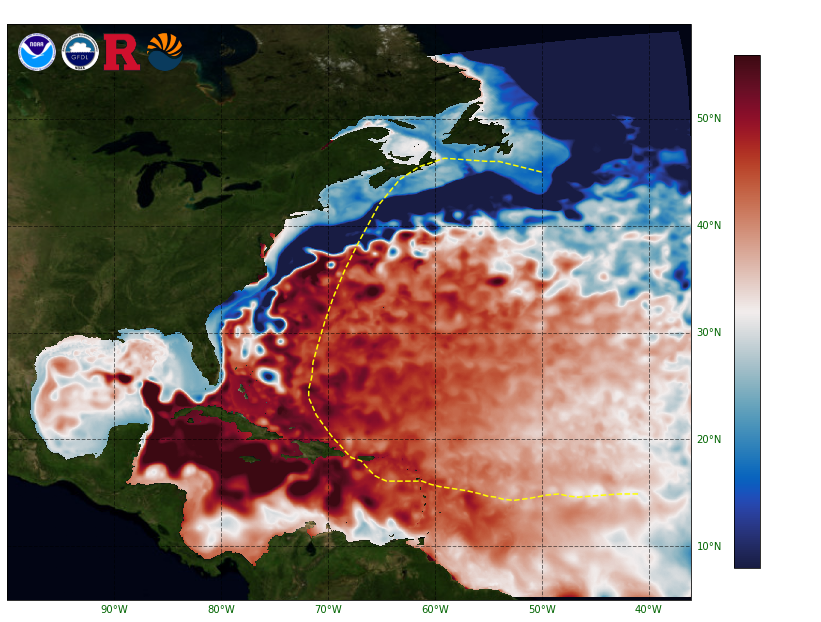

In [50]:
import matplotlib.image as image
var_list = ['sss','ssh050','sst']
pngDir="/Users/james/Documents/Github/nwa25/misc/images/"
# Note that in previous versions of this code, the for loop below was much more concise. However, there were weird issues with imshow and the bluemarble image would be distorted.
var="sst"
img = plt.imread(f'{pngDir}bluemarble.png')
img_extent = (-180, 180, -90, 90)
i=0

figure = plt.figure(figsize=(12,12))
left = 0.01
bottom = 0.01
width = 0.99
height = 0.99
ax = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -36, 5, 55], facecolor='black')
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=255)
im = ax.pcolormesh(ds_grid.x.values, ds_grid.y.values, ds.ssh[i].values, cmap=cmo.balance, vmin=-0.5, vmax=0.5)
plt.plot(pathLon, pathLat,c='yellow', linestyle='--')
cb = plt.colorbar(im, ticks=[-0.25,0,0.25], shrink=0.6)
cb.set_label('SST (m)', color='w', fontsize=12)
plt.title(str("Hurricane Hortense: NWA25 Sea Surface Height - " + str(ds.time[i].values)), fontsize=14, color='w')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.left_labels = False
gl.right_labels=True
gl.bottom_labels=True
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator([-100,-90,-80,-70, -60, -50, -40])
gl.ylocator = mticker.FixedLocator([10, 20, 30, 40, 50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'darkgreen', 'weight': 'normal'}
gl.ylabel_style = {'color': 'darkgreen', 'weight': 'normal'}
cb.ax.yaxis.set_tick_params(color='w')
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='w')
outfile = str(workdir + outdir + var + datetime.strptime(str(ds.time[i].values), "%Y-%m-%d %H:%M:%S").strftime("%Y%m%d%H%M") + ".png")

logo1 = image.imread(f'{pngDir}noaa.png')
ax.imshow(logo1, origin='upper', extent=(-99, -95.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())

logo2 = image.imread(f'{pngDir}gfdl.png')
ax.imshow(logo2, origin='upper', extent=(-95, -91.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())

logo3 = image.imread(f'{pngDir}rutgers.png')
ax.imshow(logo3, origin='upper', extent=(-91, -87.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())

logo4 = image.imread(f'{pngDir}esmg.png')
ax.imshow(logo4, origin='upper', extent=(-87, -83.5, 54.5, 58),zorder=10,transform=ccrs.PlateCarree())
